In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [41]:
df = pd.read_csv('./results/time/res_test.csv', sep=';')
df

sg_1    sg_2    sg_3    sg_4    sg_5  t_1  t_2  t_3  t_4  t_5  ...  \
0  0.0000  0.0000  0.0000  0.0000  0.0000 -0.0  0.0 -0.0  0.0 -0.0  ...   
1  0.0000  0.0000  0.1571  0.1885  0.0000 -0.0  0.0 -0.0  0.0 -0.0  ...   
2  0.0628  0.1885  0.0000  0.0000  0.0000 -0.0  0.0 -0.0  0.0 -0.0  ...   
3  0.0000  0.0000  0.1571  0.0000  0.0628 -0.0  0.0 -0.0  0.0 -0.0  ...   
4  0.0000  0.0000  0.0000  0.0628  0.1885 -0.0  0.0 -0.0  0.0 -0.0  ...   
5  0.0000  0.0628  0.0000  0.0000  0.0000 -0.0  0.0 -0.0  0.0 -0.0  ...   
6  0.0000  0.0000  0.0000  0.0000  0.2513 -0.0  0.0 -0.0  0.0 -0.0  ...   
7  0.0000  0.0314  0.1257  0.0000  0.0000 -0.0  0.0 -0.0  0.0 -0.0  ...   
8  0.0000  0.0000  0.0000  0.0000  0.0000 -0.0  0.0 -0.0  0.0 -0.0  ...   
9  0.0000  0.2827  0.0000  0.0314  0.0000 -0.0  0.0 -0.0  0.0 -0.0  ...   

       t_1741      t_1742      t_1743      t_1744      t_1745      t_1746  \
0  -84.938158  -80.728397  -75.861386  -72.277455  -70.994025  -71.219981   
1 -112.328733 -114.723839 -118.093773 -122.406680 -127.449837 -132.838713   
2 -215.925760 -208.148882 -201.003233 -193.882880 -185.818616 -176.021697   
3  -78.134599  -80.118847  -81.620431  -82.612570  -82.925699  -82.105422   
4  -39.244195  -37.137821  -36.046526  -35.865025  -36.082599  -36.153029   
5  -70.560379  -66.945874  -62.556403  -58.622008  -55.509044  -52.741788   
6 -144.410166 -144.360904 -145.937005 -147.803955 -148.357136 -146.585786   
7  -85.729437  -83.160495  -80.277383  -76.994454  -73.731631  -71.437704   
8  -84.938158  -80.728397  -75.861386  -72.277455  -70.994025  -71.219981   
9 -107.433993 -109.415470 -112.770734 -117.687209 -123.427786 -128.731785   

       t_1747      t_1748      t_1749      t_1750  
0  -71.123196  -69.473793  -66.587240  -63.777362  
1 -138.030000 -142.385585 -145.326264 -146.547272  
2 -164.344183 -151.415210 -138.394574 -126.502069  
3  -79.391445  -73.957469  -65.373726  -54.051958  
4  -35.861219  -35.419372  -35.248102  -35.626613  
5  -49.599146  -45.857362  -42.132162  -39.554095  
6 -142.700548 -138.089939 -134.584778 -133.455121  
7  -71.192216  -73.593515  -78.308869  -84.096916  
8  -71.123196  -69.473793  -66.587240  -63.777362  
9 -132.505002 -134.388764 -134.896343 -135.087859  

[10 rows x 1755 columns]

In [42]:
# np.mean(df.iloc[0, 5:-2].values.reshape(-1, 4), axis=1)

<AxesSubplot: >

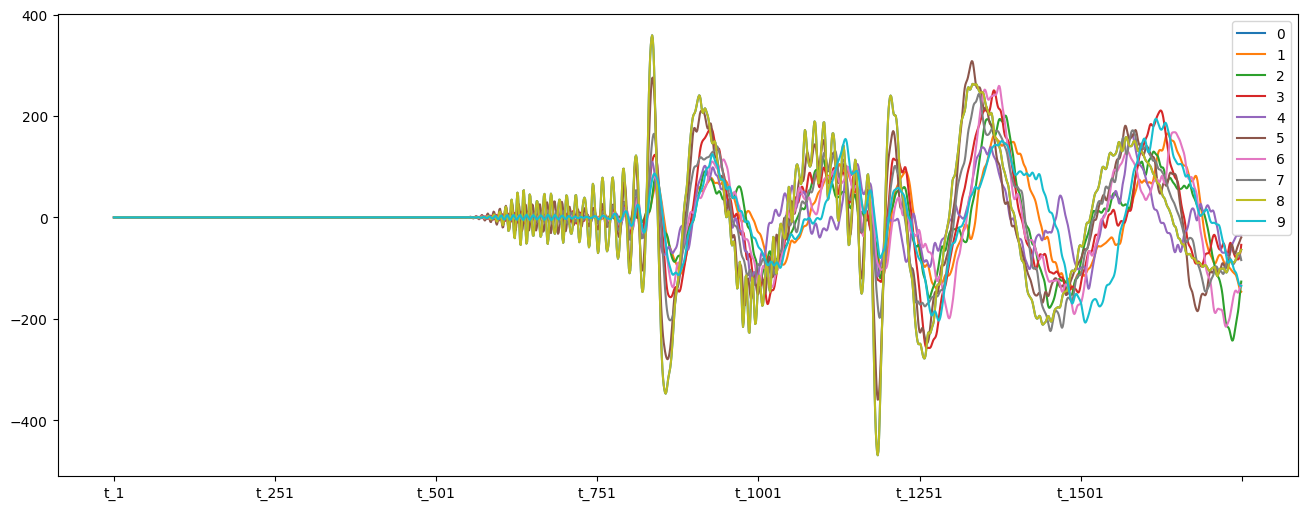

In [43]:
fig, ax = plt.subplots(figsize=(16, 6))

df.iloc[:, 5:].T.plot(ax=ax)
# ax.axvline(x=168 * 4, color='r')
# ax.axvline(x=204 * 4, color='r')
# ax.axvline(x=223 * 4, color='r')
# ax.axvline(x=243 * 4, color='r')
# ax.axvline(x=280 * 4, color='r')
# ax.axvline(x=325 * 4, color='r')
# ax.axvline(x=360 * 4, color='r')
# ax.axvline(x=420 * 4, color='r')

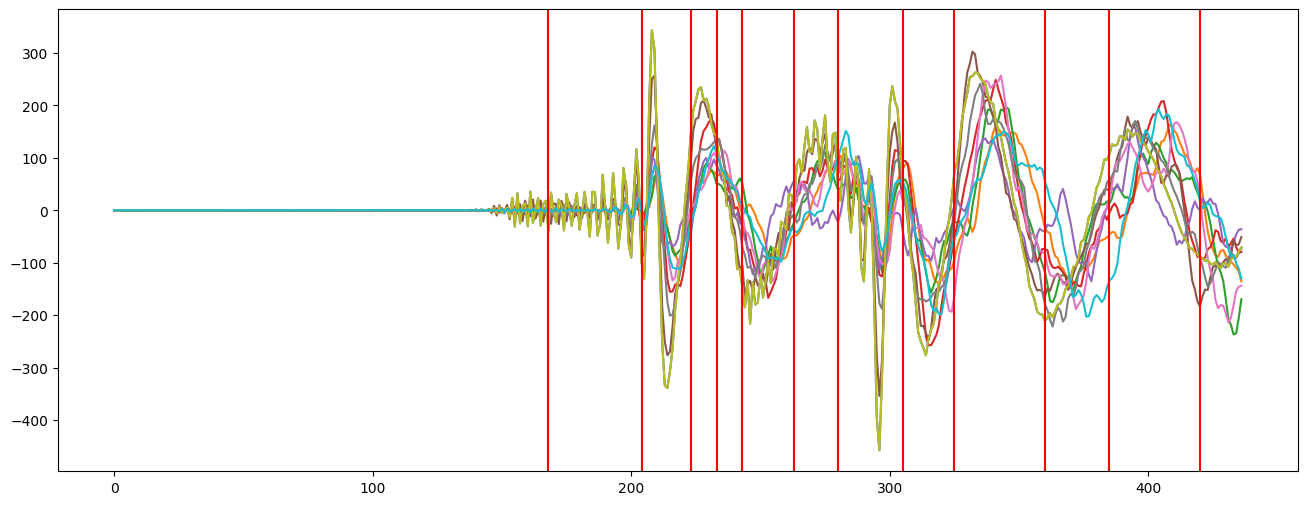

In [50]:
fig, ax = plt.subplots(figsize=(16, 6))

means = []
for i in range(10):
    means.append(np.mean(df.iloc[i, 5:-2].values.reshape(-1, 4), axis=1))
# mean_values = np.mean(df.iloc[:, 5:-2].values.reshape(10, (-1, 4)), axis=1).T
means = np.array(means).T
_ = ax.plot(means)
ax.axvline(x=168, color='r')
ax.axvline(x=204, color='r')
ax.axvline(x=223, color='r')
ax.axvline(x=233, color='r')
ax.axvline(x=243, color='r')
ax.axvline(x=263, color='r')
ax.axvline(x=280, color='r')
ax.axvline(x=305, color='r')
ax.axvline(x=325, color='r')
ax.axvline(x=360, color='r')
ax.axvline(x=385, color='r')
ax.axvline(x=420, color='r')

## Small analysis

In [51]:
df_raw = pd.read_csv('./results/time/res_test_3.csv', delimiter=';')
df_raw.iloc[:, :5] = df_raw.iloc[:, :5] > 0.05 # can be [0.0, 0.05, 0.075, 0.1, 0.15, 0.2]
df_raw.drop_duplicates(subset=df_raw.columns, inplace=True)

# select the rows with only one True value
# df_raw = df_raw[df_raw.iloc[:, :5].sum(axis=1) == 1]
df_raw

sg_1   sg_2   sg_3   sg_4   sg_5        t_1        t_2         t_3  \
0   False  False  False  False  False -39.522243 -98.512861  142.563299   
1   False  False   True   True  False   0.147119  -1.058239  -37.965836   
2    True   True  False  False  False   4.919479  -5.569943  -15.008852   
3   False  False   True  False   True   5.350050 -30.629738  -20.392770   
4   False  False  False   True   True   1.299697 -11.026162  -48.850831   
..    ...    ...    ...    ...    ...        ...        ...         ...   
95   True  False  False  False  False  -2.722226   5.771503  -16.100218   
96  False  False   True  False  False   4.199316 -20.677089  -32.558621   
97  False  False   True  False  False  -3.729162 -68.903384   48.021446   
98  False  False  False  False   True  14.814914 -56.087443   88.754731   
99  False   True  False  False  False -12.668294 -86.364542  109.155266   

           t_4         t_5        t_6        t_7         t_8         t_9  \
0   141.836249 -145.962326  10.938856  40.211330   57.484462   72.326142   
1    68.065558   -6.607708 -47.286620  95.443707   78.880976  -94.754255   
2    51.157952   51.398306 -23.396691  39.818442   55.880976  -22.588466   
3   138.997735  -32.211030  24.598524  57.745205   93.376199  -53.776324   
4    85.891404  -29.486711  55.969424 -22.523916  -37.185687    7.685894   
..         ...         ...        ...        ...         ...         ...   
95   89.996792   17.104687 -28.541114  35.807618   63.923921 -100.343553   
96   68.153660  -21.181682 -28.801395  96.076006   50.663360  -85.826010   
97  141.715428 -102.061379 -10.728688  92.229714   36.868454   -6.991910   
98   99.606235  -85.387992 -45.015022  53.942715  113.571354  -10.638861   
99  139.876864 -134.577867  24.872748  79.800197   75.595885   23.138545   

          t_10        t_11        t_12  
0  -210.300728  106.643177  -89.677920  
1   -32.748892  -46.931856   68.060295  
2  -117.159440   13.203171   22.324917  
3   -74.203311   -4.705125  -88.095297  
4   -40.440237   25.247142   -0.213099  
..         ...         ...         ...  
95 -191.542297  -79.926716 -129.053278  
96  -87.918163    4.368461  -60.726154  
97 -153.946852   52.826437  -97.111284  
98 -149.518665    7.512676  -14.631837  
99 -178.478374   81.166462  -82.182083  

[92 rows x 17 columns]

In [52]:
df_raw.describe().T

count       mean        std         min         25%        50%  \
t_1    92.0  -0.226075   6.935906  -39.522243   -1.207626   0.094068   
t_2    92.0 -15.274366  28.623689 -107.198182  -25.910885  -2.311677   
t_3    92.0  -8.470546  52.397105 -118.540395  -37.570727 -21.978645   
t_4    92.0  90.817721  49.207909   -4.836617   55.159071  87.495153   
t_5    92.0 -10.307188  52.956168 -145.962326  -43.156849   1.492972   
t_6    92.0 -36.793061  44.882614 -176.276318  -63.316865 -31.176319   
t_7    92.0  80.082302  48.073097  -23.870916   45.036244  79.671192   
t_8    92.0  17.279509  45.042888 -113.114945  -14.356216  17.918552   
t_9    92.0 -55.674865  63.007634 -237.722441  -92.130333 -59.438422   
t_10   92.0 -72.391269  87.294345 -276.932945 -142.297806 -77.325478   
t_11   92.0  -6.331665  77.303902 -147.338101  -65.076504   1.936068   
t_12   92.0 -32.700734  68.232542 -198.871475  -74.570957 -38.153184   

             75%         max  
t_1     1.562397   15.986556  
t_2     2.867020   22.145980  
t_3    21.172021  142.563299  
t_4   135.041770  200.371867  
t_5    28.981269   87.772631  
t_6   -10.082692   55.969424  
t_7   107.350820  215.878757  
t_8    55.865712  127.737368  
t_9   -10.526104  116.009072  
t_10   -0.933774  109.156882  
t_11   39.472134  174.406602  
t_12   17.134775  135.572130

In [53]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
df = df_raw
df.iloc[:, 5:] = scaler.fit_transform(df.iloc[:,5:].to_numpy())
df

sg_1   sg_2   sg_3   sg_4   sg_5       t_1       t_2       t_3       t_4  \
0   False  False  False  False  False -5.696659 -2.923963  2.898279  1.042476   
1   False  False   True   True  False  0.054101  0.499377 -0.566003 -0.464902   
2    True   True  False  False  False  0.745937  0.340892 -0.125467 -0.810380   
3   False  False   True  False   True  0.808356 -0.539396 -0.228783  0.984476   
4   False  False  False   True   True  0.221187  0.149229 -0.774882 -0.100661   
..    ...    ...    ...    ...    ...       ...       ...       ...       ...   
95   True  False  False  False  False -0.361860  0.739289 -0.146410 -0.016774   
96  False  False   True  False  False  0.641537 -0.189784 -0.462241 -0.463101   
97  False  False   True  False  False -0.507833 -1.883855  1.084059  1.040008   
98  False  False  False  False   True  2.180451 -1.433663  1.865714  0.179578   
99  False   True  False  False  False -1.803715 -2.497222  2.257192  1.002440   

         t_5       t_6       t_7       t_8       t_9      t_10      t_11  \
0  -2.575686  1.069311 -0.833927  0.897484  2.042648 -1.588478  1.469446   
1   0.070242 -0.235081  0.321294  1.375112 -0.623631  0.456611 -0.528080   
2   1.171603  0.300111 -0.842144  0.861690  0.527995 -0.515652  0.254086   
3  -0.415889  1.375321 -0.467195  1.698685  0.030297 -0.020872  0.021156   
4  -0.364162  2.078105 -2.146074 -1.215811  1.011115  0.368020  0.410740   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.520470  0.184864 -0.926033  1.041230 -0.712826 -1.372413 -0.957239   
96 -0.206474  0.179033  0.334519  0.745218 -0.481154 -0.178843  0.139175   
97 -1.742138  0.583905  0.254071  0.437278  0.776885 -0.939379  0.769460   
98 -1.425560 -0.184192 -0.546726  2.149495  0.718687 -0.888374  0.180071   
99 -2.359529  1.381464 -0.005900  1.301780  1.257709 -1.221940  1.138074   

        t_12  
0  -0.839620  
1   1.484822  
2   0.810862  
3  -0.816298  
4   0.478740  
..       ...  
95 -1.419858  
96 -0.412985  
97 -0.949158  
98  0.266265  
99 -0.729161  

[92 rows x 17 columns]

In [54]:
df.describe().T

count          mean       std       min       25%       50%       75%  \
t_1    92.0 -2.896234e-17  1.005479 -5.696659 -0.142293  0.046410  0.259270   
t_2    92.0  1.255035e-16  1.005479 -3.229057 -0.373635  0.455347  0.637262   
t_3    92.0 -9.654113e-18  1.005479 -2.112196 -0.558421 -0.259215  0.568829   
t_4    92.0 -2.654881e-17  1.005479 -1.954533 -0.728624 -0.067891  0.903643   
t_5    92.0 -1.930823e-17  1.005479 -2.575686 -0.623717  0.224050  0.745970   
t_6    92.0 -1.110223e-16  1.005479 -3.124764 -0.594198  0.125829  0.598377   
t_7    92.0  1.484414e-16  1.005479 -2.174248 -0.733011 -0.008599  0.570338   
t_8    92.0 -7.240585e-18  1.005479 -2.910758 -0.706195  0.014265  0.861349   
t_9    92.0 -1.206764e-17  1.005479 -2.905126 -0.581758 -0.060059  0.720487   
t_10   92.0  9.654113e-17  1.005479 -2.355965 -0.805202 -0.056834  0.823066   
t_11   92.0  0.000000e+00  1.005479 -1.834048 -0.764085  0.107537  0.595763   
t_12   92.0  4.344351e-17  1.005479 -2.448704 -0.617003 -0.080348  0.734380   

           max  
t_1   2.350301  
t_2   1.314484  
t_3   2.898279  
t_4   2.238552  
t_5   1.862243  
t_6   2.078105  
t_7   2.840269  
t_8   2.465719  
t_9   2.739742  
t_10  2.091120  
t_11  2.350834  
t_12  2.479681

In [55]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]